In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("C:\\Users\\yerpu\\OneDrive\\Desktop\\Data_Analytics\\Case_study_Bike_share\\Spreadsheets\\202205-divvy-tripdata.csv")

In [ ]:
df.head(10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634858 entries, 0 to 634857
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             634858 non-null  object 
 1   rideable_type       634858 non-null  object 
 2   started_at          634858 non-null  object 
 3   ended_at            634858 non-null  object 
 4   start_station_name  548154 non-null  object 
 5   start_station_id    548154 non-null  object 
 6   end_station_name    541687 non-null  object 
 7   end_station_id      541687 non-null  object 
 8   start_lat           634858 non-null  float64
 9   start_lng           634858 non-null  float64
 10  end_lat             634136 non-null  float64
 11  end_lng             634136 non-null  float64
 12  member_casual       634858 non-null  object 
dtypes: float64(4), object(9)
memory usage: 63.0+ MB


In [9]:
# deleting null values from the dataframe as they constitute only a small portion of the data
df = df.dropna()


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502545 entries, 0 to 634547
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             502545 non-null  object 
 1   rideable_type       502545 non-null  object 
 2   started_at          502545 non-null  object 
 3   ended_at            502545 non-null  object 
 4   start_station_name  502545 non-null  object 
 5   start_station_id    502545 non-null  object 
 6   end_station_name    502545 non-null  object 
 7   end_station_id      502545 non-null  object 
 8   start_lat           502545 non-null  float64
 9   start_lng           502545 non-null  float64
 10  end_lat             502545 non-null  float64
 11  end_lng             502545 non-null  float64
 12  member_casual       502545 non-null  object 
dtypes: float64(4), object(9)
memory usage: 53.7+ MB


In [13]:
# adding trip_duration column to the dataframe
# but first converting the columns to datetime format
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502545 entries, 0 to 634547
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             502545 non-null  object        
 1   rideable_type       502545 non-null  object        
 2   started_at          502545 non-null  datetime64[ns]
 3   ended_at            502545 non-null  datetime64[ns]
 4   start_station_name  502545 non-null  object        
 5   start_station_id    502545 non-null  object        
 6   end_station_name    502545 non-null  object        
 7   end_station_id      502545 non-null  object        
 8   start_lat           502545 non-null  float64       
 9   start_lng           502545 non-null  float64       
 10  end_lat             502545 non-null  float64       
 11  end_lng             502545 non-null  float64       
 12  member_casual       502545 non-null  object        
dtypes: datetime64[ns](2), float64

In [15]:
# now calculating the trip_duration column
df['trip_duration'] = df['ended_at'] - df['started_at']

In [16]:
df['trip_duration']

0        0 days 00:33:21
1        0 days 00:37:54
2        0 days 00:21:50
3        0 days 00:08:42
4        0 days 00:05:01
               ...      
634001   0 days 01:06:30
634182   0 days 00:00:13
634378   0 days 00:34:10
634445   0 days 00:18:19
634547   0 days 00:01:13
Name: trip_duration, Length: 502545, dtype: timedelta64[ns]

In [22]:
# converting trip_duration to hours
df['trip_duration'] = df['trip_duration'].dt.total_seconds() / 3600

In [23]:
df['trip_duration']

0         0.555833
1         0.631667
2         0.363889
3         0.145000
4         0.083611
            ...   
634001    1.108333
634182    0.003611
634378    0.569444
634445    0.305278
634547    0.020278
Name: trip_duration, Length: 502545, dtype: float64

In [24]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member,0.555833
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member,0.631667
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member,0.363889
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member,0.145000
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member,0.083611


In [25]:
# creating a new column day_of_week
df['day_of_week'] = df['started_at'].dt.day_name()

In [26]:
df['day_of_week']

0            Monday
1         Wednesday
2          Thursday
3           Tuesday
4           Tuesday
            ...    
634001       Sunday
634182     Saturday
634378       Friday
634445       Monday
634547     Thursday
Name: day_of_week, Length: 502545, dtype: object

In [28]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,day_of_week
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member,0.555833,Monday
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member,0.631667,Wednesday
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member,0.363889,Thursday
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member,0.145000,Tuesday
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member,0.083611,Tuesday


In [29]:
# checking if we have duplicate rows
df.duplicated().sum()

0

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502545 entries, 0 to 634547
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             502545 non-null  object        
 1   rideable_type       502545 non-null  object        
 2   started_at          502545 non-null  datetime64[ns]
 3   ended_at            502545 non-null  datetime64[ns]
 4   start_station_name  502545 non-null  object        
 5   start_station_id    502545 non-null  object        
 6   end_station_name    502545 non-null  object        
 7   end_station_id      502545 non-null  object        
 8   start_lat           502545 non-null  float64       
 9   start_lng           502545 non-null  float64       
 10  end_lat             502545 non-null  float64       
 11  end_lng             502545 non-null  float64       
 12  member_casual       502545 non-null  object        
 13  trip_duration       502545 no

In [32]:
# let's find out which day has the most trips
df['day_of_week'].value_counts()

Monday       87281
Sunday       83246
Saturday     78704
Tuesday      74965
Thursday     66620
Friday       58076
Wednesday    53653
Name: day_of_week, dtype: int64

<AxesSubplot:>

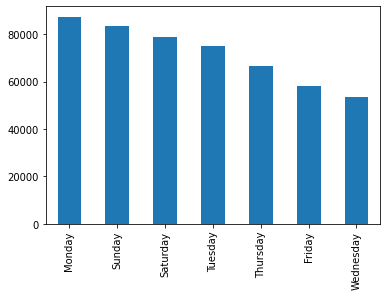

In [35]:
# plotting the day_of_week column vs total trips snd sort them according to the total trips
df['day_of_week'].value_counts().plot(kind='bar')


In [38]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,day_of_week
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member,0.555833,Monday
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member,0.631667,Wednesday
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member,0.363889,Thursday
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member,0.145000,Tuesday
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member,0.083611,Tuesday


In [39]:
# let's calculate distance wrt to latitudes and longitudes given

# Input them in the haversine distance
#  formula: d = 2R⋅sin⁻¹(√[sin²((θ₂ - θ₁)/2) + cosθ₁⋅cosθ₂⋅sin²((φ₂ - φ₁)/2)])

In [40]:
# let's calculate the distance between the start and end points of the trip
# first we need to convert the latitudes and longitudes to radians
df['start_lat'] = df['start_lat'].apply(lambda x: np.radians(x))
df['start_lng'] = df['start_lng'].apply(lambda x: np.radians(x))
df['end_lat'] = df['end_lat'].apply(lambda x: np.radians(x))
df['end_lng'] = df['end_lng'].apply(lambda x: np.radians(x))



In [41]:
df['start_lat']

0         0.731144
1         0.730961
2         0.730983
3         0.730983
4         0.730983
            ...   
634001    0.731346
634182    0.731689
634378    0.732367
634445    0.731689
634547    0.730595
Name: start_lat, Length: 502545, dtype: float64

In [45]:
# now we can calculate the distance
df['distance'] = 2 * 6371 * np.arcsin(np.sqrt(np.sin((df['end_lat'] - df['start_lat']) / 2) ** 2 + np.cos(df['start_lat']) * np.cos(df['end_lat']) * np.sin((df['end_lng'] - df['start_lng']) / 2) ** 2))
# refferced from :- https://www.omnicalculator.com/other/latitude-longitude-distance#:~:text=The%20distance%20between%20any%20two%20latitudes%20is%20approximately%2069%20miles,and%20meet%20at%20the%20poles.

In [46]:
df['distance']

0         6.088235
1         0.602870
2         3.844073
3         0.802763
4         0.913438
            ...   
634001    2.257702
634182    0.000000
634378    0.000000
634445    0.000000
634547    0.000000
Name: distance, Length: 502545, dtype: float64

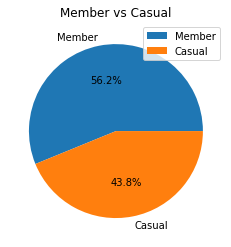

In [64]:
import matplotlib.pyplot as plt
# how many casual and how many members are there in the dataframe

# df['member_casual'].value_counts()
# creating a pie_Chart for the casual and member
plt.pie(df['member_casual'].value_counts(), labels=['Member', 'Casual'], autopct='%1.1f%%')
plt.title('Member vs Casual')
plt.legend(loc='upper right')

plt.show()

In [49]:
# we've got trip duration in hours and distance covered in km
# let's calculate the average ride_length for members and casual riders
avg_ride_length_members = df[df['member_casual'] == 'member']['distance'].mean()
avg_ride_length_casual = df[df['member_casual'] == 'casual']['distance'].mean()


In [50]:
avg_ride_length_members

2.1216485239532688

In [51]:
avg_ride_length_casual

2.2106817202575857

In [52]:
# avg trip duration for members and casual riders
avg_trip_duration_members = df[df['member_casual'] == 'member']['trip_duration'].mean()
avg_trip_duration_casual = df[df['member_casual'] == 'casual']['trip_duration'].mean()


In [53]:
avg_trip_duration_casual


0.46174648019840436

In [54]:
avg_trip_duration_members

0.22168044638249992

In [55]:
# let's calculate the average number of trips per day for members and casual riders
avg_trips_per_day_members = df[df['member_casual'] == 'member']['day_of_week'].value_counts().mean()
avg_trip_per_day_casual = df[df['member_casual'] == 'casual']['day_of_week'].value_counts().mean()


In [56]:
avg_trips_per_day_members

40328.42857142857

In [57]:
avg_trip_per_day_casual

31463.714285714286

In [71]:

# discriptive analysis
# calculating max_ride length overall.
max_ride_length = max(df['distance'])
max_ride_length

28.035731971076306

In [72]:
max_duration = max(df['trip_duration'])
max_duration

178.7161111111111

In [73]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,day_of_week,distance
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,0.731144,-1.529375,0.732055,-1.529763,member,0.555833,Monday,6.088235
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,0.730961,-1.529201,0.731055,-1.529214,member,0.631667,Wednesday,0.602870
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,0.730983,-1.529625,0.731427,-1.530175,member,0.363889,Thursday,3.844073
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,0.730983,-1.529625,0.731024,-1.529465,member,0.145000,Tuesday,0.802763
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,0.730983,-1.529625,0.731045,-1.529799,member,0.083611,Tuesday,0.913438


In [74]:
# delting the column start_lat, start_lng, end_lat, end_lng
df = df.drop(['start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1)

In [75]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,trip_duration,day_of_week,distance
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,member,0.555833,Monday,6.088235
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,member,0.631667,Wednesday,0.602870
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,member,0.363889,Thursday,3.844073
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,member,0.145000,Tuesday,0.802763
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,member,0.083611,Tuesday,0.913438


In [76]:
# let's find out if we have more trips in morning, afternoon, evening or night.
df['hour_of_day'] = df['started_at'].dt.hour

In [77]:
df['hour_of_day'].value_counts()

17    53165
18    44457
16    44436
15    35081
19    33385
13    30827
14    30738
12    30306
11    26061
20    22940
8     22006
10    20740
9     18140
21    18140
7     18134
22    14655
23    10182
6      9535
0      7128
1      4024
5      3508
2      2435
3      1382
4      1140
Name: hour_of_day, dtype: int64

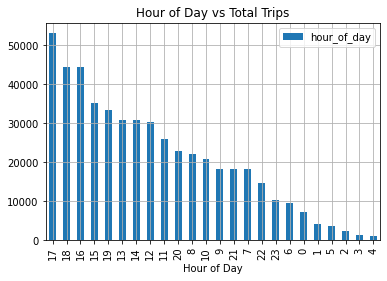

In [84]:
# let's plot the hour_of_day vs total trips
df['hour_of_day'].value_counts().plot(kind='bar')
plt.title('Hour of Day vs Total Trips')
plt.legend(loc='upper right')
# adding grid
plt.grid(True)
plt.xlabel('Hour of Day')
plt.show()

In [85]:
# it seems that there are most trips in the evening at around 4pm to 6pm

In [87]:

df['rideable_type'].value_counts()


classic_bike     323601
electric_bike    152824
docked_bike       26120
Name: rideable_type, dtype: int64

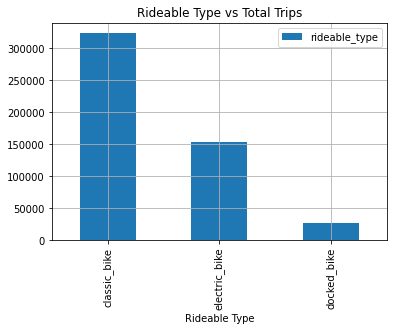

In [89]:

df['rideable_type'].value_counts().plot(kind='bar')
plt.title('Rideable Type vs Total Trips')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlabel('Rideable Type')
plt.show()



Text(0.5, 1.0, 'Classic Bike vs type of users')

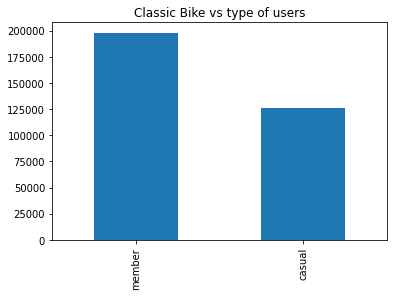

In [94]:
# how many members and casual riders use classic bikes
df[df['rideable_type'] == 'classic_bike']['member_casual'].value_counts()
#plotting a chart
df[df['rideable_type'] == 'classic_bike']['member_casual'].value_counts().plot(kind='bar')
plt.title('Classic Bike vs type of users')

Text(0.5, 1.0, 'Electric Bike vs type of users')

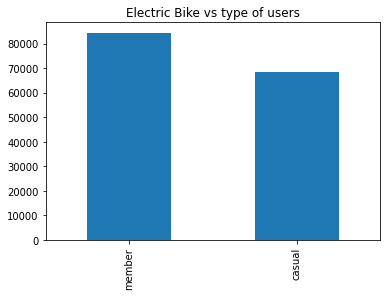

In [95]:
# let's find out how many members and casual riders use electric bikes
df[df['rideable_type'] == 'electric_bike']['member_casual'].value_counts()
#plotting a chart
df[df['rideable_type'] == 'electric_bike']['member_casual'].value_counts().plot(kind='bar')
plt.title('Electric Bike vs type of users')


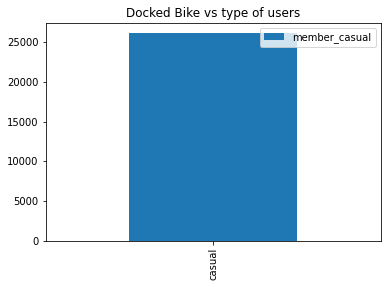

In [98]:
# let's find out how many members and casual riders use hybrid bikes
df[df['rideable_type'] == 'docked_bike']['member_casual'].value_counts()
#plotting a chart
df[df['rideable_type'] == 'docked_bike']['member_casual'].value_counts().plot(kind='bar')
plt.title('Docked Bike vs type of users')
plt.legend(loc='upper right')


In [99]:
# only casual drivers use docked bikes

In [100]:
df[df['member_casual'] == 'casual']



,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,trip_duration,day_of_week,distance,hour_of_day
7,377BE1F5F0E399CA,docked_bike,2022-05-29 19:19:24,2022-05-29 19:31:34,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Clybourn Ave,TA1309000030,casual,0.202778,Sunday,1.527282,19
28,84676EDD2699ABF5,docked_bike,2022-05-14 13:53:16,2022-05-14 17:30:55,Ellis Ave & 53rd St,KA1503000052,Ellis Ave & 53rd St,KA1503000052,casual,3.627500,Saturday,0.000000,13
44,CD303C87F4939429,classic_bike,2022-05-31 09:45:45,2022-05-31 09:53:40,Clark St & Newport St,632,Racine Ave & Wrightwood Ave,TA1309000059,casual,0.131944,Tuesday,1.776388,9
65,A373F319A922F3EA,classic_bike,2022-05-22 12:14:35,2022-05-22 12:44:28,Sedgwick St & North Ave,TA1307000038,Wood St & Milwaukee Ave,13221,casual,0.498056,Sunday,2.833735,12
67,8B11C996325D5251,electric_bike,2022-05-13 10:26:26,2022-05-13 10:32:14,Canal St & Jackson Blvd,13138,Canal St & Taylor St,15550,casual,0.096667,Friday,0.790103,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
631959,32AB4F449B4F8184,electric_bike,2022-05-30 21:53:35,2022-05-30 22:12:04,Orange & Addison,320,Orange & Addison,320,casual,0.308056,Monday,0.000000,21
632073,CFA628793A8E1A43,electric_bike,2022-05-11 09:18:40,2022-05-11 09:46:51,Orange & Addison,320,Orange & Addison,320,casual,0.469722,Wednesday,0.000000,9
632084,317758B0C5D6432D,electric_bike,2022-05-11 17:59:42,2022-05-11 18:06:10,California Ave & Division St,13256,California Ave & Milwaukee Ave,13084,casual,0.107778,Wednesday,2.187681,17
633270,2751A20F087A39B5,docked_bike,2022-05-16 10:44:42,2022-05-16 14:48:47,Campbell Ave & Montrose Ave,15623,Campbell Ave & Montrose Ave,15623,casual,4.068056,Monday,0.000000,10


In [107]:
# let's see which starting station has most numbers of casual riders
station_with_most_casual_riders = df[df['member_casual'] == 'casual']['start_station_name'].value_counts()


In [108]:
# for members
station_with_member_riders = df[df['member_casual'] == 'member']['start_station_name'].value_counts()

In [111]:
# let's see which starting station has most numbers of members
station_with_most_riders = df['start_station_name'].value_counts()
station_with_most_riders

Streeter Dr & Grand Ave                   9470
DuSable Lake Shore Dr & Monroe St         5487
Michigan Ave & Oak St                     5165
DuSable Lake Shore Dr & North Blvd        5012
Theater on the Lake                       4301
                                          ... 
Yates Blvd & 93rd St                         1
Harding Ave & 47th St                        1
Linder Ave & Belmont Ave                     1
Yates Blvd & Exchange Ave                    1
Ashland Ave & 45th St - midblock south       1
Name: start_station_name, Length: 1024, dtype: int64

In [112]:
station_with_most_casual_riders

Streeter Dr & Grand Ave               7473
DuSable Lake Shore Dr & Monroe St     4261
Michigan Ave & Oak St                 3397
Millennium Park                       3199
DuSable Lake Shore Dr & North Blvd    3061
                                      ... 
Talman Ave & 51st St - midblock          1
Kimbark Ave & 63rd St                    1
Michigan Ave & 110th St                  1
Narragansett Ave & Fullerton Ave         1
Avondale Ave & Addison St                1
Name: start_station_name, Length: 972, dtype: int64

In [113]:
# we can target the stations with most casual riders


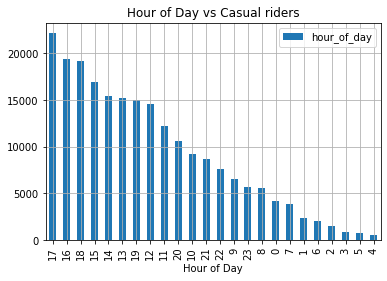

In [117]:
# let's find at what time of day the most casual riders are using the bikes
df[df['member_casual'] == 'casual']['hour_of_day'].value_counts()
# plotting a chart
df[df['member_casual'] == 'casual']['hour_of_day'].value_counts().plot(kind='bar')
plt.title('Hour of Day vs Casual riders')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlabel('Hour of Day')
plt.show()

In [115]:
# hence we can target the casual members at evening in top stations

In [118]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,trip_duration,day_of_week,distance,hour_of_day
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,member,0.555833,Monday,6.088235,23
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,member,0.631667,Wednesday,0.602870,8
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,member,0.363889,Thursday,3.844073,18
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,member,0.145000,Tuesday,0.802763,7
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,member,0.083611,Tuesday,0.913438,17


In [125]:
trips_df = df.groupby(['start_station_name','end_station_name']).size().reset_index(name = 'Number of Trips')
trips_df

,start_station_name,end_station_name,Number of Trips
0,111th St - Morgan Park Metra,Walden Pkwy & 103rd St,1
1,2112 W Peterson Ave,2112 W Peterson Ave,11
2,2112 W Peterson Ave,Ashland Ave & Wellington Ave,2
3,2112 W Peterson Ave,Broadway & Argyle St,3
4,2112 W Peterson Ave,Broadway & Berwyn Ave,4
...,...,...,...
79275,Yates Blvd & 75th St,Wentworth Ave & 35th St,2
79276,Yates Blvd & 75th St,Yates Blvd & 75th St,6
79277,Yates Blvd & 93rd St,Clyde Ave & 87th St,1
79278,Yates Blvd & Exchange Ave,Harper Ave & 59th St,1


In [130]:
# get trips only for casual riders
trips_df_casual = df[df['member_casual'] == 'casual'].groupby(['start_station_name','end_station_name']).size().reset_index(name = 'Number of Trips')
trips_df_casual = trips_df_casual.sort_values(by='Number of Trips', ascending=False)
trips_df_casual

,start_station_name,end_station_name,Number of Trips
46593,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,1546
17457,DuSable Lake Shore Dr & Monroe St,DuSable Lake Shore Dr & Monroe St,995
32654,Michigan Ave & Oak St,Michigan Ave & Oak St,731
17578,DuSable Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,635
33632,Millennium Park,Millennium Park,504
...,...,...,...
24877,Kedzie Ave & Milwaukee Ave,Wilton Ave & Belmont Ave,1
24874,Kedzie Ave & Milwaukee Ave,Western Ave & Roscoe St,1
24873,Kedzie Ave & Milwaukee Ave,Western Ave & Leland Ave,1
24872,Kedzie Ave & Milwaukee Ave,Western Ave & Fillmore St,1


In [132]:
# convert the dataframe to a csv file
trips_df_casual.to_csv('trips_df_casual.csv')

In [133]:
# hence we can target top results in top stations for casual riders at evening.